<a href="https://colab.research.google.com/github/nausheen53/SMAI/blob/master/DAFINAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data=pd.read_excel("/content/drive/My Drive/DA-1/earth.xls")

In [4]:
data

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE
0,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
1,1.0,-2474.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.9692,8.78459,7.42707,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,2.0,-325.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.9692,8.78459,7.42707,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,3.0,25.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.9692,8.78459,7.42707,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
4,4.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.73705,5.73705,6.40228,5.99969,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,7,28.0,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.07428,1.25394,2.91501,32.8°N,78.4°E,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN
52986,52971.0,2019.0,7,28.0,10:44:10,16:14:10,3.6,3.6,NaN,3.43659,1.95447,3.33473,25.5°N,90.4°E,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52987,52972.0,2019.0,7,28.0,21:25:06,2019-07-29 02:55:06,4,4,NaN,3.79891,2.65499,3.75446,23.2°N,86.5°E,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52988,52973.0,2019.0,7,29.0,03:33:53,09:03:53,4.3,4.3,NaN,4.07065,3.18039,4.06925,32.8°N,76.4°E,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


In [5]:
data.isnull().sum(axis = 0)

Sl. No.            1
YEAR               1
MONTH             19
DATE              58
ORIGIN TIME    31803
Unnamed: 5     52563
MAGNITUDE      12054
Unnamed: 7      2507
Unnamed: 8     40706
Unnamed: 9      2492
Unnamed: 10      169
Unnamed: 11      169
LAT (N)            1
LONG (E)           1
DEPTH (km)      2179
INTENSITY      52948
Unnamed: 16    52989
Unnamed: 17    52989
LOCATION       43616
REFERENCE       1583
dtype: int64

In [6]:
features = ['YEAR ', 'MONTH ', 'DATE','Unnamed: 7','LAT (N)', 'LONG (E)', 'DEPTH (km)','REFERENCE']

In [7]:
data=data.drop([0])

In [8]:
data1 = data.reset_index(drop=True)

In [9]:
final_data=data1[features]
final_data

,YEAR,MONTH,DATE,Unnamed: 7,LAT (N),LONG (E),DEPTH (km),REFERENCE
0,-2474.0,0,0.0,7.5,71,24,0.0,Dr STGR
1,-325.0,0,0.0,7.5,71,24,0.0,Dr STGR
2,25.0,0,0.0,7.5,72.9,33.72,0.0,Dr STGR
3,26.0,5,10.0,6.1397,17.3,80.1,NaN,NEIC
4,26.0,5,10.0,6.1397,26,97,80.0,G-R
...,...,...,...,...,...,...,...,...
52984,2019.0,7,28.0,3.2,32.8°N,78.4°E,10.0,NaN
52985,2019.0,7,28.0,3.6,25.5°N,90.4°E,70.0,NaN
52986,2019.0,7,28.0,4,23.2°N,86.5°E,22.0,NaN
52987,2019.0,7,29.0,4.3,32.8°N,76.4°E,20.0,NaN


In [10]:
final_data_1 = final_data.rename(columns = {'Unnamed: 7': 'MAGNITUDE'}, inplace = False)

In [11]:
final_data_1

,YEAR,MONTH,DATE,MAGNITUDE,LAT (N),LONG (E),DEPTH (km),REFERENCE
0,-2474.0,0,0.0,7.5,71,24,0.0,Dr STGR
1,-325.0,0,0.0,7.5,71,24,0.0,Dr STGR
2,25.0,0,0.0,7.5,72.9,33.72,0.0,Dr STGR
3,26.0,5,10.0,6.1397,17.3,80.1,NaN,NEIC
4,26.0,5,10.0,6.1397,26,97,80.0,G-R
...,...,...,...,...,...,...,...,...
52984,2019.0,7,28.0,3.2,32.8°N,78.4°E,10.0,NaN
52985,2019.0,7,28.0,3.6,25.5°N,90.4°E,70.0,NaN
52986,2019.0,7,28.0,4,23.2°N,86.5°E,22.0,NaN
52987,2019.0,7,29.0,4.3,32.8°N,76.4°E,20.0,NaN


In [12]:
final_data_1.isnull().sum(axis = 0)

YEAR             0
MONTH           18
DATE            57
MAGNITUDE     2507
LAT (N)          0
LONG (E)         0
DEPTH (km)    2178
REFERENCE     1582
dtype: int64

In [13]:
final_data_1['MAGNITUDE'].fillna((final_data_1['MAGNITUDE'].mean()), inplace=True)

In [14]:
final_data_1['DEPTH (km)'].fillna((final_data_1['DEPTH (km)'].mean()), inplace=True)

In [15]:
mont = final_data_1['MONTH ']
dat = final_data_1['DATE']

In [16]:
final_data_1['MONTH ']=final_data_1['MONTH '].fillna(final_data_1['MONTH '].mode()[0])
final_data_1['DATE']=final_data_1['DATE'].fillna(final_data_1['DATE'].mode()[0])
final_data_1['REFERENCE'] = final_data_1['REFERENCE'].fillna(final_data_1['REFERENCE'].mode()[0])

In [17]:
df_reference  = final_data_1['REFERENCE']
df_reference

0        Dr STGR
1        Dr STGR
2        Dr STGR
3           NEIC
4            G-R
          ...   
52984    Dr STGR
52985    Dr STGR
52986    Dr STGR
52987    Dr STGR
52988    Dr STGR
Name: REFERENCE, Length: 52989, dtype: object

In [18]:
ref  =  df_reference.tolist()
myset = set(ref)
print(myset)
print(len(myset))
attr = myset

{'G-R/BDA', 'G-R/T-S', 'T-S', 'CM/ISS', 'LEE/T-S', 'RO', 'BDA', 'T-S/G-R', 'LEE', 'ISR', 'MALIK', 'OLD', 'GERI', 'BDA/CM', 'G-R', 'NGRI', 'IMD', 'Dr STGR', 'J & S', 'NEIC / USGS', ' ISC', 'HRVD', 'CM/G-R', 'TAN', 'LEE/CM', 'ISS/T-S', 'CM/LEE', 'G-R/CM', 'PDE/T-S', 'ISC', 'BCI', 'CHAN', 'GSI', 'NEIC', 'PDE', 'USGS', 'SHL', 'ISS'}
38


In [19]:
!pip install pandas

In [20]:
final_data_1 = pd.concat([final_data_1,pd.get_dummies(df_reference)],axis=1)

# now drop the original 'country' column (you don't need it anymore)
final_data_1.drop(['REFERENCE'],axis=1, inplace=True)

In [21]:
final_data_1

,YEAR,MONTH,DATE,MAGNITUDE,LAT (N),LONG (E),DEPTH (km),ISC,BCI,BDA,BDA/CM,CHAN,CM/G-R,CM/ISS,CM/LEE,Dr STGR,G-R,G-R/BDA,G-R/CM,G-R/T-S,GERI,GSI,HRVD,IMD,ISC,ISR,ISS,ISS/T-S,J & S,LEE,LEE/CM,LEE/T-S,MALIK,NEIC,NEIC / USGS,NGRI,OLD,PDE,PDE/T-S,RO,SHL,T-S,T-S/G-R,TAN,USGS
0,-2474.0,0,0.0,7.5000,71,24,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-325.0,0,0.0,7.5000,71,24,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25.0,0,0.0,7.5000,72.9,33.72,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26.0,5,10.0,6.1397,17.3,80.1,45.569867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,26.0,5,10.0,6.1397,26,97,80.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52984,2019.0,7,28.0,3.2000,32.8°N,78.4°E,10.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52985,2019.0,7,28.0,3.6000,25.5°N,90.4°E,70.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52986,2019.0,7,28.0,4.0000,23.2°N,86.5°E,22.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52987,2019.0,7,29.0,4.3000,32.8°N,76.4°E,20.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
latitude = final_data_1['LAT (N)'].tolist()
latitude_1=[]
for lat in latitude:
  if(type(lat)==int):
    latitude_1.append(float(lat))
  elif(type(lat)==float):
    latitude_1.append(lat)
  elif(type(lat)==str):
    s=''
    if(lat[-1]=='S'):
      # print("S wala")
      for char in lat:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      if(lat[0]>='0' and lat[0]<='9'):
        latitude_1.append(-1*float(s))
      else:
        # print("haa bhai")
        latitude_1.append(float(s))
    else:
      for char in lat:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      # print(s)
      if(lat[0]>='0' and lat[0]<='9'):
        latitude_1.append(float(s))
      else:
        # print("minus ",-1*s)
        latitude_1.append(-1*float(s))
  



print(len(latitude_1)) 

52989


In [23]:
longitude = final_data_1['LONG (E)'].tolist()
longitude_1=[]
for long in longitude:
  if(type(long)==int):
    longitude_1.append(float(long))
  elif(type(long)==float):
    longitude_1.append(long)
  elif(type(long)==str):
    s=''
    if(long[-1]=='W'):
      # print("S wala")
      for char in long:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      if(long[0]>='0' and long[0]<='9'):
        longitude_1.append(-1*float(s))
      else:
        # print("haa bhai")
        longitude_1.append(float(s))
    else:
      for char in long:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      # print(s)
      if(long[0]>='0' and long[0]<='9'):
        longitude_1.append(float(s))
      else:
        # print("minus ",-1*s)
        longitude_1.append(-1*float(s))
  



print(len(longitude_1)) 

52989


In [24]:
import math
date = final_data_1['DATE'].tolist()
date_int =[]


for dt in date:
  date_int.append(int(dt))

year = final_data_1['YEAR '].tolist()
year_int =[]
for yr in year:
  year_int.append(int(yr))
  

month = final_data_1['MONTH '].tolist()
# month_int=[]

# for mt in month:
#   month_int.append(int(mt))

In [25]:
final_data_2 = final_data_1.drop(['LAT (N)','LONG (E)','DATE','YEAR ','MONTH '],axis=1)
print(final_data_2)

       MAGNITUDE  DEPTH (km)   ISC  BCI  BDA  ...  SHL  T-S  T-S/G-R  TAN  USGS
0         7.5000    0.000000     0    0    0  ...    0    0        0    0     0
1         7.5000    0.000000     0    0    0  ...    0    0        0    0     0
2         7.5000    0.000000     0    0    0  ...    0    0        0    0     0
3         6.1397   45.569867     0    0    0  ...    0    0        0    0     0
4         6.1397   80.000000     0    0    0  ...    0    0        0    0     0
...          ...         ...   ...  ...  ...  ...  ...  ...      ...  ...   ...
52984     3.2000   10.000000     0    0    0  ...    0    0        0    0     0
52985     3.6000   70.000000     0    0    0  ...    0    0        0    0     0
52986     4.0000   22.000000     0    0    0  ...    0    0        0    0     0
52987     4.3000   20.000000     0    0    0  ...    0    0        0    0     0
52988     3.0000   10.000000     0    0    0  ...    0    0        0    0     0

[52989 rows x 40 columns]


In [26]:

df_latitude = pd.DataFrame (latitude_1,columns=['latitude'])
print(df_latitude)
df_longitude = pd.DataFrame(longitude_1,columns=['longitude'])
print(df_longitude)

df_date = pd.DataFrame(date_int,columns=['date'])
df_year = pd.DataFrame(year_int,columns=['years'])
df_month = pd.DataFrame(month,columns=['month']) 

       latitude
0          71.0
1          71.0
2          72.9
3          17.3
4          26.0
...         ...
52984      32.8
52985      25.5
52986      23.2
52987      32.8
52988      20.0

[52989 rows x 1 columns]
       longitude
0          24.00
1          24.00
2          33.72
3          80.10
4          97.00
...          ...
52984      78.40
52985      90.40
52986      86.50
52987      76.40
52988      72.80

[52989 rows x 1 columns]


In [27]:
df11 = pd.concat([final_data_2,df_latitude],axis=1)
df22 = pd.concat([df11,df_longitude],axis=1)
df22

,MAGNITUDE,DEPTH (km),ISC,BCI,BDA,BDA/CM,CHAN,CM/G-R,CM/ISS,CM/LEE,Dr STGR,G-R,G-R/BDA,G-R/CM,G-R/T-S,GERI,GSI,HRVD,IMD,ISC,ISR,ISS,ISS/T-S,J & S,LEE,LEE/CM,LEE/T-S,MALIK,NEIC,NEIC / USGS,NGRI,OLD,PDE,PDE/T-S,RO,SHL,T-S,T-S/G-R,TAN,USGS,latitude,longitude
0,7.5000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.0,24.00
1,7.5000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.0,24.00
2,7.5000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.9,33.72
3,6.1397,45.569867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17.3,80.10
4,6.1397,80.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.0,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52984,3.2000,10.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.8,78.40
52985,3.6000,70.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.5,90.40
52986,4.0000,22.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.2,86.50
52987,4.3000,20.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.8,76.40


In [28]:
target_label=df22['MAGNITUDE']

In [29]:
target_label=pd.to_numeric(target_label)

In [30]:
print(target_label)

0        7.5000
1        7.5000
2        7.5000
3        6.1397
4        6.1397
          ...  
52984    3.2000
52985    3.6000
52986    4.0000
52987    4.3000
52988    3.0000
Name: MAGNITUDE, Length: 52989, dtype: float64


In [31]:
count=0
for i in range(0,len(target_label)):
    
#     print(target_label.iloc[i])
    if(target_label.iloc[i]<=5):
        target_label.iloc[i]=0
        # print("A ",target_label.iloc[i])
    else:
        target_label.iloc[i]=1
        count=count+1
        # print("T",target_label.iloc[i])
        
# print(target_label)

In [32]:
df22=df22.drop('MAGNITUDE',axis=1)

In [33]:
# df22=(df22-df22.mean())/df22.std()

## **USING LATITUDE,LONGITUDE,DEPTH AS FEATURE**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df22, target_label, test_size=0.2, random_state=42)

# **KNN WITH K = 3**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
predicted=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,precision_score,classification_report
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

0.8229854689564069
**********KNN WITH K = 3 ***********
accuracy score  0.8229854689564069
********************
f1 score  [0.89890063 0.28939394]
********************
recall score  0.8229854689564069
********************
confusion matrix  [[8340 1282]
 [ 594  382]]
********************
precision score  0.8686841140145778
********************
classification report                precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      9622
         1.0       0.23      0.39      0.29       976

    accuracy                           0.82     10598
   macro avg       0.58      0.63      0.59     10598
weighted avg       0.87      0.82      0.84     10598



In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [39]:
y_test=y_test.to_numpy()
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

print("roc_auc ",roc_auc)
print("fpr,tpr ",fpr,tpr)
print("threshold ",threshlod)

roc_auc  0.5815398660691223
fpr,tpr  [0.         0.06648758 1.        ] [0.         0.22956731 1.        ]
threshold  [2. 1. 0.]


# **KNN WITH K = 5**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 5***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(y_test, predicted)
roc_auc_1 = auc(fpr_1, tpr_1)

print("roc_auc ",roc_auc_1)
print("fpr,tpr ",fpr_1,tpr_1)
print("threshold ",threshlod_1)

0.8368560105680317
**********KNN WITH K = 5***********
accuracy score  0.8368560105680317
********************
f1 score  [0.90835851 0.2576213 ]
********************
recall score  0.8368560105680317
********************
confusion matrix  [[8569 1364]
 [ 365  300]]
********************
precision score  0.9102734027194243
********************
classification report                precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      9933
         1.0       0.18      0.45      0.26       665

    accuracy                           0.84     10598
   macro avg       0.57      0.66      0.58     10598
weighted avg       0.91      0.84      0.87     10598

roc_auc  0.5697166507378898
fpr,tpr  [0.         0.04085516 1.        ] [0.         0.18028846 1.        ]
threshold  [2. 1. 0.]


# **KNN WITH K =7**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(y_test, predicted)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.8424230986978675
**********KNN WITH K = 7 ***********
accuracy score  0.8424230986978675
********************
f1 score  [0.91216998 0.23464711]
********************
recall score  0.8424230986978675
********************
confusion matrix  [[8672 1408]
 [ 262  256]]
********************
precision score  0.9307496241959718
********************
classification report                precision    recall  f1-score   support

         0.0       0.97      0.86      0.91     10080
         1.0       0.15      0.49      0.23       518

    accuracy                           0.84     10598
   macro avg       0.56      0.68      0.57     10598
weighted avg       0.93      0.84      0.88     10598

ROC_AUC  0.5622599920786623
FPR,TPR  [0.         0.02932617 1.        ] [0.         0.15384615 1.        ]
THRESHOLD  [2. 1. 0.]


# **ROC FOR DIFFERENT VALUES OF K**

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

**According to the below present ROC curve for k=3, AUC is 0.582 it means there is 58.2% chance that model will be able to distinguish between positive class and negative class**.

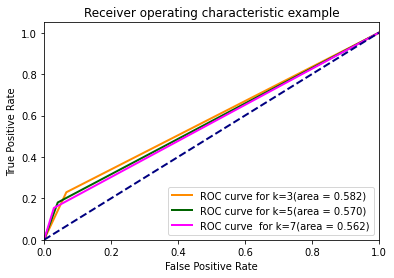

In [42]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for k=3(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for k=5(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for k=7(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **DECISION TREE CLASSIFIER WITH DEPTH =3**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42,max_depth=3)

In [44]:
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 

0.8516701264389508

In [45]:
accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(prefict,y_test)
roc_auc = auc(fpr, tpr)

print("ROC_AUC ",roc_auc)
print("FPR,TPR ",fpr,tpr)
print("THRESHOLD ",threshlod)

0.8516701264389508
**********DECISION TREE WITH DEPTH = 3 ***********
accuracy score  0.8516701264389508
********************
f1 score  [0.91903585 0.11685393]
********************
recall score  0.8516701264389508
********************
confusion matrix  [[8922 1560]
 [  12  104]]
********************
precision score  0.98841014834711
********************
classification report                precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     10482
         1.0       0.06      0.90      0.12       116

    accuracy                           0.85     10598
   macro avg       0.53      0.87      0.52     10598
weighted avg       0.99      0.85      0.91     10598

ROC_AUC  0.8738625821605512
FPR,TPR  [0.         0.14882656 1.        ] [0.         0.89655172 1.        ]
THRESHOLD  [2. 1. 0.]


# **DECISION TREE CLASSIFIER WITH DEPTH = 4**

In [46]:
clf = DecisionTreeClassifier(random_state=42,max_depth=4)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 4 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(prefict,y_test)
roc_auc_1 = auc(fpr_1, tpr_1)

print("ROC_AUC ",roc_auc_1)
print("FPR,TPR ",fpr_1,tpr_1)
print("THRESHOLD ",threshlod_1)

0.851953198716739
**********DECISION TREE WITH DEPTH = 4 ***********
accuracy score  0.851953198716739
********************
f1 score  [0.91911954 0.12687813]
********************
recall score  0.851953198716739
********************
confusion matrix  [[8915 1550]
 [  19  114]]
********************
precision score  0.9862102085758705
********************
classification report                precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     10465
         1.0       0.07      0.86      0.13       133

    accuracy                           0.85     10598
   macro avg       0.53      0.85      0.52     10598
weighted avg       0.99      0.85      0.91     10598

ROC_AUC  0.8545150501672242
FPR,TPR  [0.         0.14811276 1.        ] [0.         0.85714286 1.        ]
THRESHOLD  [2. 1. 0.]


# **DECISION TREE CLASSIFIER WITH DEPTH =10**

In [47]:
clf = DecisionTreeClassifier(random_state=42,max_depth=10)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 10 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(prefict,y_test)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.8509152670315154
**********DECISION TREE WITH DEPTH = 10 ***********
accuracy score  0.8509152670315154
********************
f1 score  [0.91759675 0.21859545]
********************
recall score  0.8509152670315154
********************
confusion matrix  [[8797 1443]
 [ 137  221]]
********************
precision score  0.955889770472657
********************
classification report                precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     10240
         1.0       0.13      0.62      0.22       358

    accuracy                           0.85     10598
   macro avg       0.56      0.74      0.57     10598
weighted avg       0.96      0.85      0.89     10598

ROC_AUC  0.7382002335020951
FPR,TPR  [0.         0.14091797 1.        ] [0.         0.61731844 1.        ]
THRESHOLD  [2. 1. 0.]


# **ROC CURVE FOR DIFFERENT PRE-PRUNE DEPTH**

According to the below present ROC curve for pre-prune depth=2, AUC is 0.874 it means there is 87.4% chance that model will be able to distinguish between positive class and negative class.

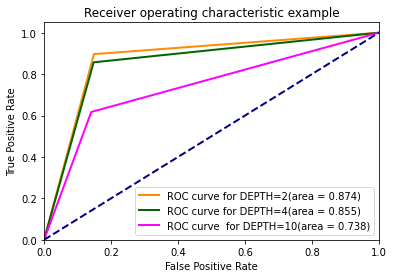

In [48]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for DEPTH=2(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for DEPTH=4(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for DEPTH=10(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **SECOND APPROACH: Using Year,month,date,latitude,longitude,depth as features**

In [49]:
df33 = pd.concat([df22,df_year],axis=1)
df44 = pd.concat([df33,df_date],axis=1)
df55 = pd.concat([df44,df_month],axis=1)
print(df55)

       DEPTH (km)   ISC  BCI  BDA  ...  longitude  years  date  month
0        0.000000     0    0    0  ...      24.00  -2474     0      0
1        0.000000     0    0    0  ...      24.00   -325     0      0
2        0.000000     0    0    0  ...      33.72     25     0      0
3       45.569867     0    0    0  ...      80.10     26    10      5
4       80.000000     0    0    0  ...      97.00     26    10      5
...           ...   ...  ...  ...  ...        ...    ...   ...    ...
52984   10.000000     0    0    0  ...      78.40   2019    28      7
52985   70.000000     0    0    0  ...      90.40   2019    28      7
52986   22.000000     0    0    0  ...      86.50   2019    28      7
52987   20.000000     0    0    0  ...      76.40   2019    29      7
52988   10.000000     0    0    0  ...      72.80   2019    31      7

[52989 rows x 44 columns]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df44, target_label, test_size=0.2, random_state=42)

# **KNN CLASSIFIER WITH K = 3,5,7**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
predicted=model.predict(X_test)

In [53]:
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

0.8455368937535384
**********KNN WITH K = 3 ***********
accuracy score  0.8455368937535384
********************
f1 score  [0.91124966 0.40494366]
********************
recall score  0.8455368937535384
********************
confusion matrix  [[8404 1107]
 [ 530  557]]
********************
precision score  0.8785268601528194
********************
classification report                precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      9511
         1.0       0.33      0.51      0.40      1087

    accuracy                           0.85     10598
   macro avg       0.64      0.70      0.66     10598
weighted avg       0.88      0.85      0.86     10598



In [54]:
y_test=y_test.to_numpy()
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

print("roc_auc ",roc_auc)
print("fpr,tpr ",fpr,tpr)
print("threshold ",threshlod)

roc_auc  0.6377058229365776
fpr,tpr  [0.         0.05932393 1.        ] [0.         0.33473558 1.        ]
threshold  [2. 1. 0.]


In [55]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 5***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(y_test, predicted)
roc_auc_1 = auc(fpr_1, tpr_1)

print("roc_auc ",roc_auc_1)
print("fpr,tpr ",fpr_1,tpr_1)
print("threshold ",threshlod_1)

0.8564823551613512
**********KNN WITH K = 5***********
accuracy score  0.8564823551613512
********************
f1 score  [0.91845816 0.40188753]
********************
recall score  0.8564823551613512
********************
confusion matrix  [[8566 1153]
 [ 368  511]]
********************
precision score  0.9047554626239538
********************
classification report                precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      9719
         1.0       0.31      0.58      0.40       879

    accuracy                           0.86     10598
   macro avg       0.63      0.73      0.66     10598
weighted avg       0.90      0.86      0.88     10598

roc_auc  0.6329501951275164
fpr,tpr  [0.         0.04119096 1.        ] [0.         0.30709135 1.        ]
threshold  [2. 1. 0.]


In [56]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(y_test, predicted)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.8633704472541989
**********KNN WITH K = 7 ***********
accuracy score  0.8633704472541989
********************
f1 score  [0.92283918 0.40411523]
********************
recall score  0.8633704472541989
********************
confusion matrix  [[8659 1173]
 [ 275  491]]
********************
precision score  0.9204928898352249
********************
classification report                precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      9832
         1.0       0.30      0.64      0.40       766

    accuracy                           0.86     10598
   macro avg       0.63      0.76      0.66     10598
weighted avg       0.92      0.86      0.89     10598

ROC_AUC  0.6321454152029412
FPR,TPR  [0.         0.03078128 1.        ] [0.         0.29507212 1.        ]
THRESHOLD  [2. 1. 0.]


In [57]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))

In [58]:
# y_test=y_test.to_numpy()

In [59]:
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# # for i in range(0,2):
# fpr, tpr,threshlod = roc_curve(y_test, predicted)
# roc_auc = auc(fpr, tpr)

# **ROC CURVE FOR DIFFERENT VALUES OF K**

According to the below present ROC curve for k=3, AUC is 0.638 it means there is 63.8% chance that model will be able to distinguish between positive class and negative class.

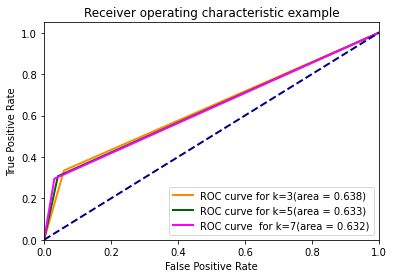

In [60]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for k=3(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for k=5(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for k=7(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **DECISION TREE WITH PRE-PRUNE DEPTH = 2,4,10**

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42,max_depth=2)

In [62]:
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)

0.8632760898282695

In [63]:
# y_test=y_test.to_numpy()

In [64]:

fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, prefict)
roc_auc = auc(fpr, tpr)

In [65]:
print(roc_auc)
print(fpr,tpr)
print(threshlod)

0.6276881828924936
[0.         0.02887844 1.        ] [0.         0.28425481 1.        ]
[2. 1. 0.]


In [97]:
clf = DecisionTreeClassifier(random_state=42,max_depth=4)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 4 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(prefict,y_test)
roc_auc_1 = auc(fpr_1, tpr_1)

print("ROC_AUC ",roc_auc_1)
print("FPR,TPR ",fpr_1,tpr_1)
print("THRESHOLD ",threshlod_1)

0.8721456878656351
**********DECISION TREE WITH DEPTH = 4 ***********
accuracy score  0.8721456878656351
********************
f1 score  [0.92910584 0.34949592]
********************
recall score  0.8721456878656351
********************
confusion matrix  [[8879 1300]
 [  55  364]]
********************
precision score  0.9631998216682671
********************
classification report                precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     10179
         1.0       0.22      0.87      0.35       419

    accuracy                           0.87     10598
   macro avg       0.61      0.87      0.64     10598
weighted avg       0.96      0.87      0.91     10598

ROC_AUC  0.8705105813574252
FPR,TPR  [0.         0.12771392 1.        ] [0.         0.86873508 1.        ]
THRESHOLD  [2. 1. 0.]


In [67]:
# y_test=y_test.to_numpy()

In [68]:
clf = DecisionTreeClassifier(random_state=42,max_depth=10)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,precision_score,classification_report
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 10 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(prefict,y_test)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.873938478958294
**********DECISION TREE WITH DEPTH = 10 ***********
accuracy score  0.873938478958294
********************
f1 score  [0.92928972 0.4196351 ]
********************
recall score  0.873938478958294
********************
confusion matrix  [[8779 1181]
 [ 155  483]]
********************
precision score  0.9409688775853687
********************
classification report                precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      9960
         1.0       0.29      0.76      0.42       638

    accuracy                           0.87     10598
   macro avg       0.64      0.82      0.67     10598
weighted avg       0.94      0.87      0.90     10598

ROC_AUC  0.8192394971736476
FPR,TPR  [0.        0.1185743 1.       ] [0.         0.75705329 1.        ]
THRESHOLD  [2. 1. 0.]


**According to the below present ROC curve for pre-prune depth=4, AUC is 0.871 it means there is 87.1% chance that model will be able to distinguish between positive class and negative class.**

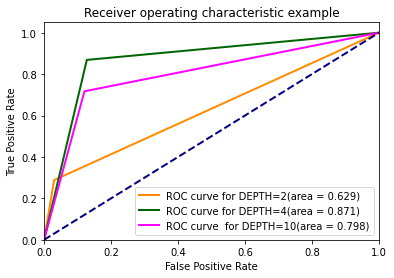

In [98]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for DEPTH=2(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for DEPTH=4(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for DEPTH=10(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **FEATURE PROCESSING , USING DATE,MONTH,YEAR CREATING A NEW FEATURE TIMESTAMP**

**date month and year has to be in yyyymmdd format for conversion into timestamp.**

In [70]:

import math
date = dat.tolist()
date_str =[]
# hel = []
for dt in date:
  if(math.isnan(dt)):
    # print("hey")
    date_str.append('00')
  else:
    date_int = int(dt)
    date_s = str(date_int)
    if(len(date_s)==1):
      date_str.append('0'+date_s)
    else:
      date_str.append(str(date_int))

In [71]:
year = df55['years'].tolist()
year_str =[]
for yr in year:
  year_int = int(yr)
  year_str.append(str(year_int))

print(len(year_str))

52989


In [72]:
month = mont.tolist()
month_str=[]
heal = []
for mt in month:
  if(type(mt)==int):
    month_s = str(mt)
    if(len(month_s)==1):
      month_str.append('0'+month_s)
    else:
      month_str.append(month_s)
  else:
    heal.append(1)
    month_str.append("00")

print(len(month_str))

52989


In [73]:
final_date=[]
for i in range(0,len(date)):
  s = year_str[i]+'-'+month_str[i] + '-'+date_str[i]
  final_date.append(s)

## **using numpy dateTime for converting date,month,year to timeStamp**

In [74]:
import numpy as np
from datetime import datetime
dt = datetime.utcnow()
timeStamp_=[]

def get_timestamp(date_str):
  dt64 = np.datetime64(dt)
  date_str = date_str.strip()
    # Remove + sign
  if date_str[0] == '+':
      date_str = date_str[1:]
    # Remove missing month/day
  date_str = date_str.split('-00', maxsplit=1)[0]
  if(date_str == "1995-06-31"):
      date_str = '1995-06-30'
  elif(date_str == "2015-11-31"):
      date_str = "2015-11-30"
  ts = (dt64 - np.datetime64(date_str)) / np.timedelta64(1, 's')
  return ts


for date1 in final_date:
  ts1 = get_timestamp(date1)
  timeStamp_.append(ts1)

In [75]:
df66  = df55.drop(['date','month','years'],axis=1)

In [76]:
df_timestamp =  pd.DataFrame(timeStamp_,columns=['timestamp'])

In [77]:
final_df = pd.concat([df66,df_timestamp],axis=1)
final_df

,DEPTH (km),ISC,BCI,BDA,BDA/CM,CHAN,CM/G-R,CM/ISS,CM/LEE,Dr STGR,G-R,G-R/BDA,G-R/CM,G-R/T-S,GERI,GSI,HRVD,IMD,ISC,ISR,ISS,ISS/T-S,J & S,LEE,LEE/CM,LEE/T-S,MALIK,NEIC,NEIC / USGS,NGRI,OLD,PDE,PDE/T-S,RO,SHL,T-S,T-S/G-R,TAN,USGS,latitude,longitude,timestamp
0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.0,24.00,1.418385e+11
1,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.0,24.00,7.402258e+10
2,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.9,33.72,6.297763e+10
3,45.569867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17.3,80.10,6.293495e+10
4,80.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.0,97.00,6.293495e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52984,10.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.8,78.40,3.514804e+07
52985,70.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.5,90.40,3.514804e+07
52986,22.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.2,86.50,3.514804e+07
52987,20.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.8,76.40,3.506164e+07


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target_label, test_size=0.2, random_state=42)

# **KNN WITH K=3,5,7**

In [79]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
# predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
# print(predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
predicted=model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted,y_test))
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 5***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)


0.8480845442536328
**********KNN WITH K = 5***********
accuracy score  0.873938478958294
********************
f1 score  [0.91285993 0.40808824]
********************
recall score  0.8480845442536328
********************
confusion matrix  [[8433 1109]
 [ 501  555]]
********************
precision score  0.8831021110062349
********************
classification report                precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      9542
         1.0       0.33      0.53      0.41      1056

    accuracy                           0.85     10598
   macro avg       0.64      0.70      0.66     10598
weighted avg       0.88      0.85      0.86     10598



In [82]:
y_test=y_test.to_numpy()

In [83]:
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)


In [84]:
print(roc_auc)
print(fpr,tpr)
print(threshlod)

0.6387278746060856
[0.        0.0560779 1.       ] [0.         0.33353365 1.        ]
[2. 1. 0.]


In [85]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 3***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(y_test, predicted)
roc_auc_1 = auc(fpr_1, tpr_1)

print("roc_auc ",roc_auc_1)
print("fpr,tpr ",fpr_1,tpr_1)
print("threshold ",threshlod_1)

0.8403472353274203
**********KNN WITH K = 3***********
accuracy score  0.8403472353274203
********************
f1 score  [0.90736888 0.4225256 ]
********************
recall score  0.8403472353274203
********************
confusion matrix  [[8287 1045]
 [ 647  619]]
********************
precision score  0.8612118103354629
********************
classification report                precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      9332
         1.0       0.37      0.49      0.42      1266

    accuracy                           0.84     10598
   macro avg       0.65      0.69      0.66     10598
weighted avg       0.86      0.84      0.85     10598

roc_auc  0.6497876118243185
fpr,tpr  [0.         0.07241997 1.        ] [0.         0.37199519 1.        ]
threshold  [2. 1. 0.]


In [86]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(y_test, predicted)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.8539347046612569
**********KNN WITH K = 7 ***********
accuracy score  0.8539347046612569
********************
f1 score  [0.91687252 0.3986014 ]
********************
recall score  0.8539347046612569
********************
confusion matrix  [[8537 1151]
 [ 397  513]]
********************
precision score  0.8999850340002525
********************
classification report                precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      9688
         1.0       0.31      0.56      0.40       910

    accuracy                           0.85     10598
   macro avg       0.63      0.72      0.66     10598
weighted avg       0.90      0.85      0.87     10598

ROC_AUC  0.6319281434580082
FPR,TPR  [0.         0.04443698 1.        ] [0.         0.30829327 1.        ]
THRESHOLD  [2. 1. 0.]


**According to the below present ROC curve for k = 3, AUC is 0.65 it means there is 65% chance that model will be able to distinguish between positive class and negative class.**

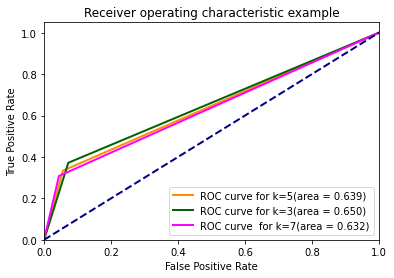

In [87]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for k=5(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for k=3(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for k=7(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **DECISION TREE CLASSIFIER WITH PRE-PRUNE DEPTH = 2,4,10**

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42,max_depth=2)

In [89]:
clf = clf.fit(X_train, y_train)
# tree.plot_tree(clf) 
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 2 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)


0.8628986601245519
**********DECISION TREE WITH DEPTH = 2 ***********
accuracy score  0.8628986601245519
********************
f1 score  [0.92264282 0.39784501]
********************
recall score  0.8628986601245519
********************
confusion matrix  [[8665 1184]
 [ 269  480]]
********************
precision score  0.9217312061645849
********************
classification report                precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      9849
         1.0       0.29      0.64      0.40       749

    accuracy                           0.86     10598
   macro avg       0.63      0.76      0.66     10598
weighted avg       0.92      0.86      0.89     10598



In [90]:
# y_test=y_test.to_numpy()

In [91]:
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, prefict)
roc_auc = auc(fpr, tpr)


In [92]:
print(roc_auc)
print(fpr,tpr)
print(threshlod)

0.6291759225775343
[0.         0.03010969 1.        ] [0.         0.28846154 1.        ]
[2. 1. 0.]


In [93]:
clf = DecisionTreeClassifier(random_state=42,max_depth=4)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 4 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(prefict,y_test)
roc_auc_1 = auc(fpr_1, tpr_1)

print("ROC_AUC ",roc_auc_1)
print("FPR,TPR ",fpr_1,tpr_1)
print("THRESHOLD ",threshlod_1)

0.8712964710322703
**********DECISION TREE WITH DEPTH = 4 ***********
accuracy score  0.8712964710322703
********************
f1 score  [0.92889908 0.32206759]
********************
recall score  0.8712964710322703
********************
confusion matrix  [[8910 1340]
 [  24  324]]
********************
precision score  0.9709590825459352
********************
classification report                precision    recall  f1-score   support

         0.0       1.00      0.87      0.93     10250
         1.0       0.19      0.93      0.32       348

    accuracy                           0.87     10598
   macro avg       0.60      0.90      0.63     10598
weighted avg       0.97      0.87      0.91     10598

ROC_AUC  0.9001513877207736
FPR,TPR  [0.         0.13073171 1.        ] [0.         0.93103448 1.        ]
THRESHOLD  [2. 1. 0.]


In [94]:
clf_1 = DecisionTreeClassifier(max_depth=10)
clf_1 = clf_1.fit(X_train, y_train)
prefict=clf_1.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 10 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(prefict,y_test)
roc_auc_2 = auc(fpr_2, tpr_2)
score = roc_auc_score(prefict,y_test)
print("score..",score)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.8695036799396112
**********DECISION TREE WITH DEPTH = 10 ***********
accuracy score  0.8695036799396112
********************
f1 score  [0.92676728 0.40155777]
********************
recall score  0.8695036799396112
********************
confusion matrix  [[8751 1200]
 [ 183  464]]
********************
precision score  0.936741054468047
********************
classification report                precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      9951
         1.0       0.28      0.72      0.40       647

    accuracy                           0.87     10598
   macro avg       0.63      0.80      0.66     10598
weighted avg       0.94      0.87      0.89     10598

score.. 0.7982826048565327
ROC_AUC  0.7982826048565327
FPR,TPR  [0.        0.1205909 1.       ] [0.         0.71715611 1.        ]
THRESHOLD  [2. 1. 0.]


In [95]:
clf = DecisionTreeClassifier(random_state=42,max_depth=3)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_3 = dict()
tpr_3 = dict()
roc_auc_3 = dict()
# for i in range(0,2):
fpr_3, tpr_3,threshlod_3 = roc_curve(prefict,y_test)
roc_auc_3 = auc(fpr_3, tpr_3)

print("ROC_AUC ",roc_auc_3)
print("FPR,TPR ",fpr_3,tpr_3)
print("THRESHOLD ",threshlod_3)

0.8677108888469522
**********DECISION TREE WITH DEPTH = 3 ***********
accuracy score  0.8677108888469522
********************
f1 score  [0.9268954  0.30525273]
********************
recall score  0.8677108888469522
********************
confusion matrix  [[8888 1356]
 [  46  308]]
********************
precision score  0.9678032666005952
********************
classification report                precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     10244
         1.0       0.19      0.87      0.31       354

    accuracy                           0.87     10598
   macro avg       0.59      0.87      0.62     10598
weighted avg       0.97      0.87      0.91     10598

ROC_AUC  0.8688431646359892
FPR,TPR  [0.         0.13237017 1.        ] [0.        0.8700565 1.       ]
THRESHOLD  [2. 1. 0.]


**According to the below present ROC curve for pre-prune depth=4, AUC is 0.90 it means there is 90% chance that model will be able to distinguish between positive class and negative class.**

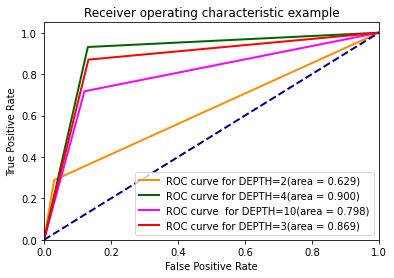

In [96]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for DEPTH=2(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for DEPTH=4(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for DEPTH=10(area = %0.3f)' % roc_auc_2)

plt.plot(fpr_3, tpr_3, color='red',
         lw=lw, label='ROC curve for DEPTH=3(area = %0.3f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**DATA CLEANING : dropped all the columns having null values more than 60% of the dataset , In case of magnitude and depth,replaced nan values by mean , In case of date and month,replaced nan values by mode  , converted latitude direction from S to N and longitude direction from W to E**

**Decision Tree classifers are better because they can distinguish postive and negetive class better than KNN classifiers, as observed in the above ROC curves**

**Observation : feature does help in improvising the model to a little extent**
**New feature - TimeStamp is created using existing features Date,month and year, without using additional feature, maximum AUC was around 87% and after using new feature AUC is 90% and has better accuracy,f1 score, recall and precision**